In [1]:
# train_and_save_linear_regression.py

import pandas as pd
from sklearn.model_selection import train_test_split
from data_preparation import load_and_preprocess_data
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import pickle
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Load and preprocess data
df = load_and_preprocess_data()

# Prepare features and target
X = df.drop(columns=[
    "cumulative_milliseconds", "positionOrder", "milliseconds"
])
y = df["milliseconds"]

['date', 'driverRef', 'number', 'date_race', 'time_race', 'time', 'forename', 'surname', 'dob', 'url_race', 'location', 'circuitRef']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define categorical and numerical features
categorical_features = ["code", "nationality", "status", "circuit_type", "country"]
numerical_features = X.columns.drop(categorical_features)

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Define the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=100)),  # Adjust n_components as needed
    ('regressor', LinearRegression())
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Save the pipeline to a file
model_path = "models/linear_regression_pipeline.pkl"
with open(model_path, 'wb') as f:
    pickle.dump(pipeline, f)

print(f"Linear Regression pipeline saved to {model_path}")


/Users/I551659/Documents/GitHub/IE650-RAMP/ie500-data-mining-group7/lap_simulation
Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'racetime_milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId'],
      dtype='object')



Initial data sizes:
Lap times: (586171, 6)


The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


The behavior will change in pa


After initial merge: (586171, 46) - All lap data merged
After year filtering (>=2018): (159538, 46)
After adding constructor info: (159538, 52)
After adding circuit info: (159538, 55)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFr

After adding weather info: (159538, 60)

Fetching weather for 92 races: [989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1069, 1070, 1071, 1072, 1073, 1096, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129]
No weather data available for race 992
No weather data available for race 1005
No weather data available for race 1013
No weather data available for race 1023
No weather data available for race 1026
No weather data available for race 1038
No weather data available for race 1057


The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

After adding tire info: (159538, 65)


The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

After adding practice info: (159538, 70)
After cleaning time intervals: (159538, 70)
Calculating enhanced driver metrics...


The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

After enhancing driver attributes: (159538, 77)
After adding dynamic features: (159538, 81)

Calculating race intervals...


The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




After calculating race intervals: (159538, 81)

Before outlier removal:

Before outlier removal:
Unique races: 146
Unique drivers per race: count    146.000000
mean      19.500000
std        0.888625
min       16.000000
25%       19.000000
50%       20.000000
75%       20.000000
max       20.000000
Name: driverId, dtype: float64

After removing outliers: (139755, 81)
Special laps removed: (2648, 81)
After dropping unnecessary columns: (139755, 49)

Removed Columns:
[]
After removing duplicate columns: (139755, 49)

Before handling missing values:
Unique races: 145
Unique drivers per race: count    145.000000
mean      19.234483
std        1.462560
min        8.000000
25%       19.000000
50%       20.000000
75%       20.000000
max       20.000000
Name: driverId, dtype: float64

Initial shape: (139755, 49)
Initial unique races: 145
Initial unique drivers: 39

Columns with missing values:

Column: driver_aggression
- Missing values: 1512 (1.08%)
- Affects 29 races and 10 drivers
- Example

KeyError: "['date', 'driverRef', 'number', 'date_race', 'time_race', 'time', 'forename', 'surname', 'dob', 'url_race', 'location', 'circuitRef'] not found in axis"

2024-12-02 21:02:31,632 - INFO - Initialized 19 drivers for raceId 1000


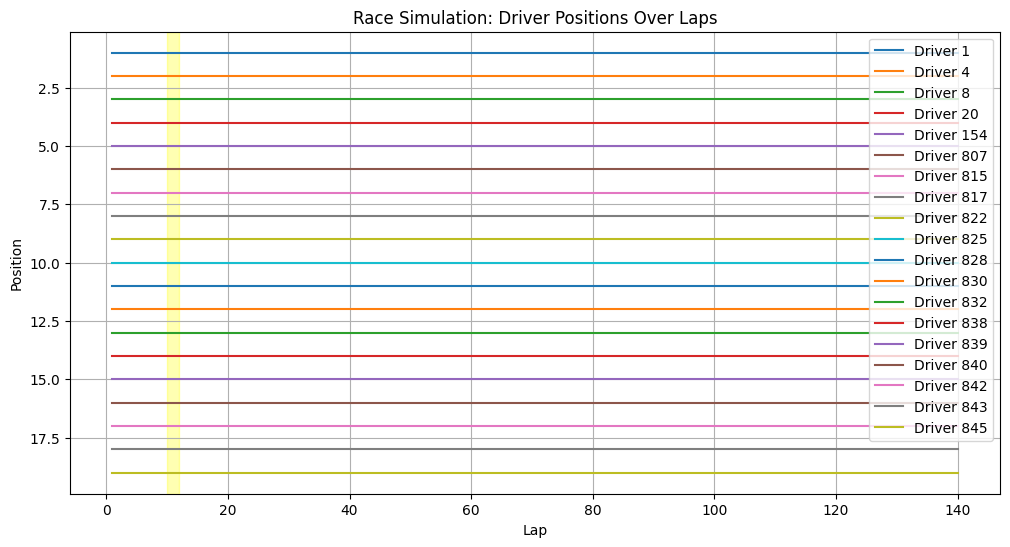

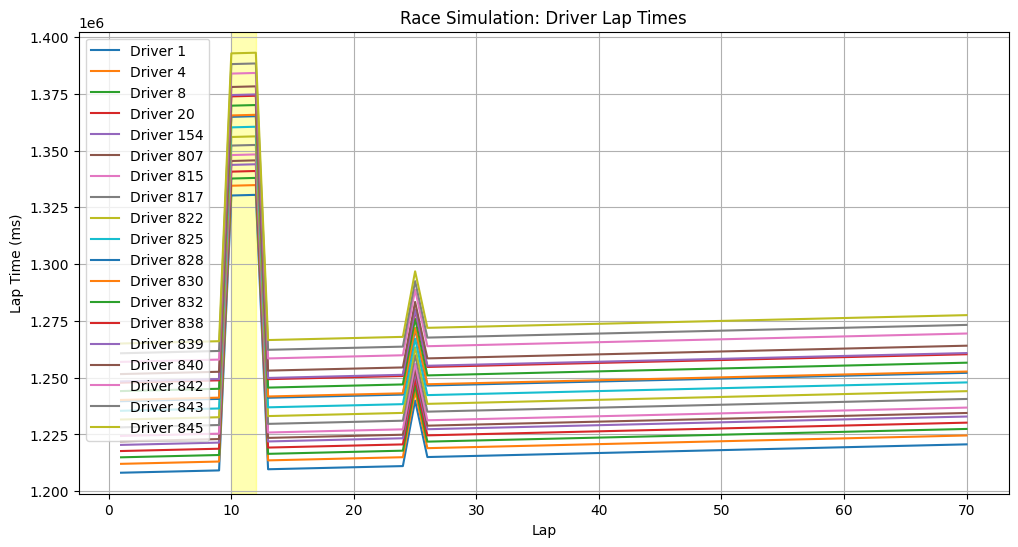

In [2]:
# simulation_linear_regression.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
from race_simulator_linear_regression import (
    Race, Driver, RaceSimulator, plot_race_positions, plot_lap_times
)
import pickle

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Load the trained pipeline
model_path = 'models/linear_regression_pipeline.pkl'
with open(model_path, 'rb') as f:
    pipeline = pickle.load(f)

# Function to get race length (you can adjust this based on your data)
def get_race_length(race_id: int, lap_times_df: pd.DataFrame) -> int:
    """
    Get the actual race length for a given race ID from historical data.
    """
    race_laps = lap_times_df[lap_times_df['raceId'] == race_id]['lap'].max()
    if pd.isna(race_laps):
        # Fallback to a default length if race not found
        return 50
    return int(race_laps)

# Load necessary data
lap_times = pd.read_csv('data/LAPS.csv', na_values=['\\N', 'NaN', ''])
race_length = get_race_length(1000, lap_times)  # Use your actual race ID

# Create an instance of the Race with actual length
race = Race(
    race_id=1000,
    circuit_id=1,
    total_laps=race_length,
    weather_conditions={},  # Add actual weather data if available
    safety_car_periods=[(10, 12)]  # Example safety car periods
)

# Load driver attributes    
drivers_df = pd.read_csv('data/util/drivers_attributes.csv')

# Define categorical and numerical features (must match training)
categorical_features = ["code", "nationality", "status", "circuit_type", "country"]
numerical_features = list(set(pipeline.named_steps['preprocessor'].transformers_[0][2]))

def initialize_drivers(drivers_df, pipeline, race):
    drivers = []

    # Filter driver attributes for the specific raceId
    drivers_df = drivers_df[drivers_df['raceId'] == race.race_id]

    if drivers_df.empty:
        raise ValueError(f"No drivers found for raceId {race.race_id}")

    for idx, row in drivers_df.iterrows():
        # Load driver features from LAPS.csv
        driver_features_df = pd.read_csv('data/LAPS.csv')  # Adjust path as needed
        driver_features = driver_features_df[driver_features_df['driverId'] == row['driverId']]

        if driver_features.empty:
            raise ValueError(f"No feature data found for driverId {row['driverId']}")

        driver_features = driver_features.iloc[0]

        # Update dynamic features based on simulation requirements
        dynamic_features = {
            'tire_age': 0,
            'fuel_load': 100.0,
            'track_position': idx + 1,
            'TrackTemp': 35.0,
            'AirTemp': 25.0,
            'Humidity': 50.0,
            'TrackStatus': 1,
            'is_pit_lap': 0,
            'tire_compound': 2  # Starting tire compound
        }

        # Combine static and dynamic features
        full_features = driver_features.to_dict()
        full_features.update(dynamic_features)

        # Create a DataFrame for the driver
        driver_df = pd.DataFrame([full_features])

        # Ensure all necessary columns are present
        for col in numerical_features + categorical_features:
            if col not in driver_df.columns:
                driver_df[col] = 0  # Add missing numerical features with zeros

        # Extract features needed for the pipeline
        driver_df = driver_df[numerical_features + categorical_features]

        # Transform features using the pipeline (excluding the regression model)
        transformed_features = pipeline.named_steps['preprocessor'].transform(driver_df)
        scaled_features = pipeline.named_steps['pca'].transform(transformed_features)

        # Create the Driver instance
        driver = Driver(
            driver_id=row['driverId'],
            name=f"Driver {row['driverId']}",
            static_features=scaled_features.flatten(),  # Using PCA-transformed features
            initial_dynamic_features=dynamic_features,
            start_position=idx + 1,
            pit_strategy=[(25, 3)],  # Example pit strategy to switch to soft tires
            starting_compound=2
        )

        # Initialize sequence as None since we're using Linear Regression
        driver.sequence = None

        drivers.append(driver)

    logging.info(f"Initialized {len(drivers)} drivers for raceId {race.race_id}")
    return drivers

# Initialize drivers using the pipeline
drivers = initialize_drivers(drivers_df, pipeline, race)

# Add drivers to the race
race.drivers.extend(drivers)

# Initialize the RaceSimulator for Linear Regression
simulator = RaceSimulator(pipeline, model_type='linear_regression')

# Simulate the race
race_lap_data = simulator.simulate_race(race)

# Proceed with analysis and plotting
plot_race_positions(race)
plot_lap_times(race)
